# **Urban Sound Classification**

This notebook includes the modelling steps for Urban Sound Dataset as a part of Koç Holding Deep Learning Bootcamp.

**Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Accessing the drive and loading the preprocessed data.**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
X_train = np.load("/content/drive/MyDrive/metadata/X_train_dataframe.npy")
y_train = np.load("/content/drive/MyDrive/metadata/y_train_dataframe.npy")

X_val = np.load("/content/drive/MyDrive/metadata/X_val_dataframe.npy")
y_val = np.load("/content/drive/MyDrive/metadata/y_val_dataframe.npy")

X_test = np.load("/content/drive/MyDrive/metadata/X_test_dataframe.npy")
y_test = np.load("/content/drive/MyDrive/metadata/y_test_dataframe.npy")


In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5238, 128, 128),
 (5238,),
 (1747, 128, 128),
 (1747,),
 (1747, 128, 128),
 (1747,))

Visualize function

In [5]:
def plot_fig(results):
  fig = plt.figure(figsize =(18,5))
  
  first_plot = fig.add_subplot(1,2,1)
  first_plot.plot(results.history["accuracy"], label="Train")
  first_plot.plot(results.history["val_accuracy"], label="Test")


  # Name the x and y axises
  first_plot.set_title("Accuracy")


  second_plot = fig.add_subplot(1,2,2)
  second_plot.plot(results.history["loss"], label="Train")
  second_plot.plot(results.history["val_loss"], label="Test")

  second_plot.set_title("loss")

  # Put legend table
  plt.legend()

  # Show the plot
  plt.show()


## **Model Trials**

##### 1

In [7]:
# Create a model object
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu",
                                 input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
41/41 [==============================] - 29s 408ms/step - loss: 2.1312 - accuracy: 0.2150 - val_loss: 1.7918 - val_accuracy: 0.3921
Epoch 2/10
41/41 [==============================] - 13s 318ms/step - loss: 1.8841 - accuracy: 0.3108 - val_loss: 1.6528 - val_accuracy: 0.4665
Epoch 3/10
41/41 [==============================] - 13s 320ms/step - loss: 1.6818 - accuracy: 0.3982 - val_loss: 1.4077 - val_accuracy: 0.5518
Epoch 4/10
41/41 [==============================] - 13s 322ms/step - loss: 1.5379 - accuracy: 0.4565 - val_loss: 1.2730 - val_accuracy: 0.5856
Epoch 5/10
41/41 [==============================] - 13s 323ms/step - loss: 1.3973 - accuracy: 0.5063 - val_loss: 1.2273 - val_accuracy: 0.6113
Epoch 6/10
41/41 [==============================] - 13s 324ms/step - loss: 1.2513 - accuracy: 0.5626 - val_loss: 1.1694 - val_accuracy: 0.6302
Epoch 7/10
41/41 [==============================] - 13s 322ms/step - loss: 1.1267 - accuracy: 0.6094 - val_loss: 1.1228 - val_accuracy: 0.6337

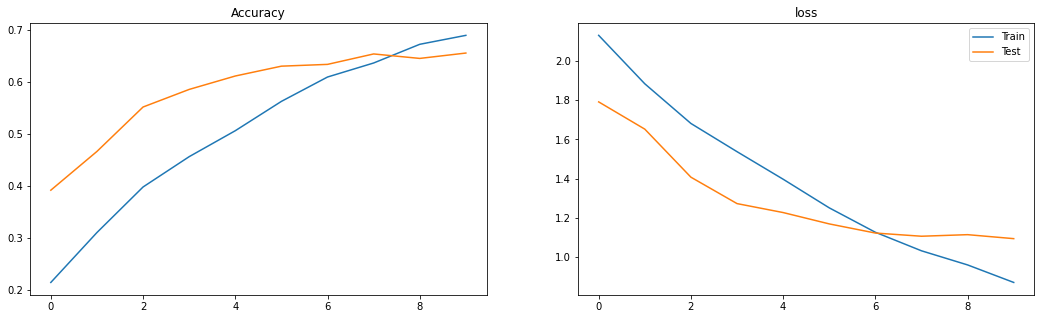

In [11]:
plot_fig(results)

In [12]:
# Evaluate the performance
model.evaluate(X_test, y_test)

55/55 [==============================] - 2s 36ms/step - loss: 1.1413 - accuracy: 0.6600


[1.1412816047668457, 0.659988522529602]

##### 2
Let's try simpler architecture and early stopping.

In [19]:
# Create a model object
model = tf.keras.Sequential()

In [20]:
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu",
                                 input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/metadata/model.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')


In [23]:
results = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[callback, checkpoint])

Epoch 1/50
163/164 [============================>.] - ETA: 0s - loss: 1.1600 - accuracy: 0.5707
Epoch 1: val_loss improved from inf to 1.24021, saving model to /content/drive/MyDrive/metadata/model.hdf5
164/164 [==============================] - 8s 47ms/step - loss: 1.1611 - accuracy: 0.5704 - val_loss: 1.2402 - val_accuracy: 0.5987
Epoch 2/50
163/164 [============================>.] - ETA: 0s - loss: 1.0011 - accuracy: 0.6336
Epoch 2: val_loss did not improve from 1.24021
164/164 [==============================] - 6s 35ms/step - loss: 1.0008 - accuracy: 0.6338 - val_loss: 1.2472 - val_accuracy: 0.5993
Epoch 3/50
163/164 [============================>.] - ETA: 0s - loss: 0.8656 - accuracy: 0.6750
Epoch 3: val_loss did not improve from 1.24021
164/164 [==============================] - 6s 36ms/step - loss: 0.8657 - accuracy: 0.6749 - val_loss: 1.3407 - val_accuracy: 0.5713
Epoch 4/50
163/164 [============================>.] - ETA: 0s - loss: 0.7548 - accuracy: 0.7189
Epoch 4: val_loss d

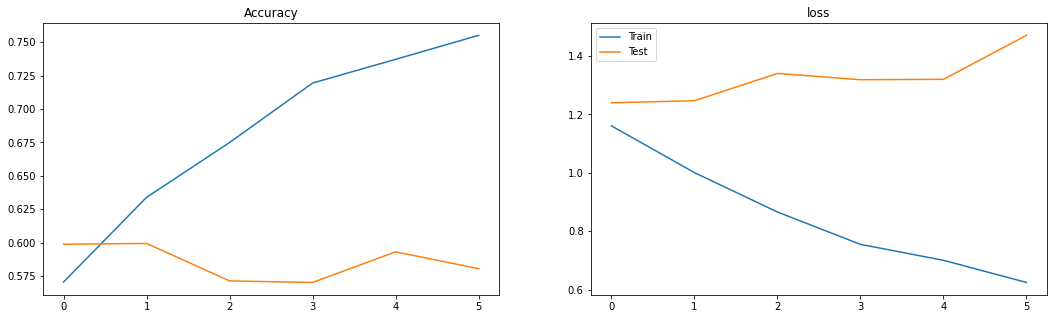

In [24]:
plot_fig(results)

In [25]:
model.evaluate(X_test, y_test)


55/55 [==============================] - 1s 13ms/step - loss: 1.4522 - accuracy: 0.5856


[1.452207326889038, 0.5855752825737]

##### 3
Model is start to overfit. Let's use early stopping with different architecture.

In [13]:
# Create a model object
model = tf.keras.Sequential()

In [14]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu",
                                 input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3), 
                                 strides=(1,1), 
                                 padding="same", 
                                 activation ="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [15]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/metadata/model.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')


In [16]:
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[callback, checkpoint])

Epoch 1/50
41/41 [==============================] - ETA: 0s - loss: 2.0891 - accuracy: 0.2241
Epoch 1: val_loss improved from inf to 1.84221, saving model to /content/drive/MyDrive/metadata/model.hdf5
41/41 [==============================] - 30s 622ms/step - loss: 2.0891 - accuracy: 0.2241 - val_loss: 1.8422 - val_accuracy: 0.3818
Epoch 2/50
41/41 [==============================] - ETA: 0s - loss: 1.8447 - accuracy: 0.3385
Epoch 2: val_loss improved from 1.84221 to 1.60139, saving model to /content/drive/MyDrive/metadata/model.hdf5
41/41 [==============================] - 18s 444ms/step - loss: 1.8447 - accuracy: 0.3385 - val_loss: 1.6014 - val_accuracy: 0.4482
Epoch 3/50
41/41 [==============================] - ETA: 0s - loss: 1.6737 - accuracy: 0.3971
Epoch 3: val_loss improved from 1.60139 to 1.48760, saving model to /content/drive/MyDrive/metadata/model.hdf5
41/41 [==============================] - 18s 442ms/step - loss: 1.6737 - accuracy: 0.3971 - val_loss: 1.4876 - val_accuracy: 

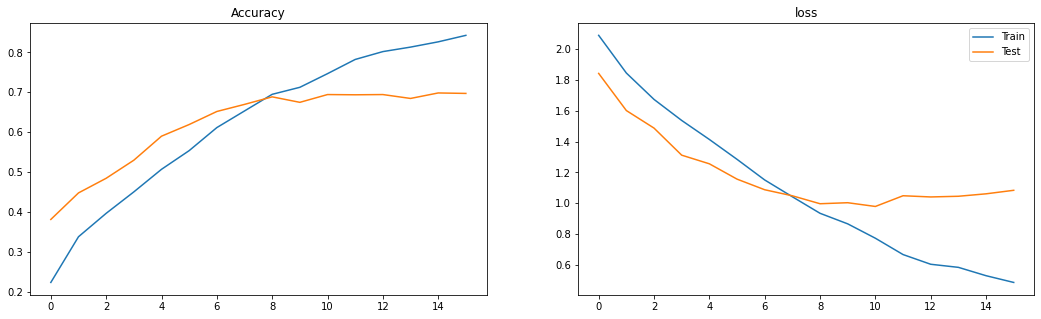

In [17]:
plot_fig(results)

In [18]:
# Evaluate the performance
model.evaluate(X_test, y_test)

55/55 [==============================] - 3s 43ms/step - loss: 1.1138 - accuracy: 0.7069


[1.1137539148330688, 0.706926167011261]